In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv'
data = pd.read_csv(file_url) # 데이터셋 읽기
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data['target'].unique() # 목표 변수의 고윳값 확인

array(['ham', 'spam'], dtype=object)

## 전처리: 특수 기호 제거하기

In [7]:
import string
string.punctuation # 특수 기호 목록 출력

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

- 문자열에서 문자를 하나씩 거내 특수 기호인지 판단한 뒤, 특수 기호가 아닌 문자들만 리스트에 저장
- 각 문자를 문장으로 합치고 나서
- 이 문자열이 문장별로 행에 저장되게 변환

In [11]:
sample_string = data['text'].loc[0]

new_string = [] # 빈 리스트 생성
for i in sample_string: # 문자열 순회
    if i not in string.punctuation: # 특수 기호가 아니면
        new_string.append(i)         # 리스트에 문자추가
new_string = ''.join(new_string)     # 리스트를 문자열 형태로 변환

In [16]:
def remove_punc(x): # 함수 정의
    new_string = [] # 빈 리스트
    for i in x: # 문자열 순회
        if i not in string.punctuation: # 특수 기호가 아니면
            new_string.append(i)         # 리스트에 문자추가
    new_string = ''.join(new_string)     # 리스트를 문자열 형태로 변환
    return new_string

In [17]:
# 작동 확인
remove_punc(sample_string) # 특수 기호 삭제 함수 호출

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [18]:
data['text'].apply(remove_punc) # 함수에 한 행씩 적용되도록 실행

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

In [19]:
data['text'] = data['text'].apply(remove_punc) # 데이터셋 업데이트

## 전처리: 불용어 제거하기

- 불용어는 자연어 분석에 큰 도움이 안 되는 단어를 의미
- 이러한 단어를 제거해주면 데이터를 조금이나마 더 가볍게 만들 수 있음
---
- 판다스 시리즈에 저장된 문자열 하나를 단어 단위로 리스트로 변환
- 불용어가 아니면 소문자로 저장한 뒤
- 문자를 문자열로 합침
- 이 과정을 반복하여 모든 문자열에 적용

In [20]:
import nltk
nltk.download('stopwords') # 불용어 목록 가져오기

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KOREAIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords # 불용어 목록 임포트
stopwords.words('english') # 영어 불용어 선택

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
sample_string = data['text'].loc[0]
sample_string.split() #  단어 단위로 문장 분할

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [24]:
# 각 단어가 불용어에 속하는지 아닌지 판독하는 코드를 구현
for i in sample_string.split(): # 순화
    if i not in stopwords.words('english'): # 불용어가 아니면
        print(i.lower())

go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat


In [25]:
new_string=[] # 빈 리스트 생성
for i in sample_string.split(): # 순회
    if i.lower() not in stopwords.words('english'):
        # 소문자로 변환한 단어가 불용어가 아니면
        new_string.append(i.lower()) # 문자 단위로 추가
        
new_string = ' '.join(new_string)   # 공백 단위로 묶기

new_string

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [27]:
def stop_words(x):
    new_string=[]
    for i in x.split():
        if i.lower() not in stopwords.words('english'):
        # 소문자로 변환한 단어가 불용어가 아니면
            new_string.append(i.lower()) # 문자 단위로 추가
    new_string = ' '.join(new_string) # 공백 단위로 묶기
    return new_string 

data['text'] = data['text'].apply(stop_words)
data['text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u £750 pound prize ...
5570                          ü b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

## 전처리 : 목표 컬럼 형태 변경하기

- 범주형 목표값인 'ham', 'spam' 은 원핫인코딩으로 전처리

In [30]:
data['target'] = data['target'].map({'spam':1, 'ham':0}) # 텍스트를 숫자로 변환
data['target'] # 출력

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

## 전처리 : 카운트 기반으로 벡터화하기

In [33]:
x = data['text'] # 독립변수
y = data['target'] # 종속변수
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
cv = CountVectorizer() # 객체 생성
cv.fit(x)
cv.vocabulary_

AttributeError: lower not found

In [40]:
x = cv.transform(x)
print(x)
# (0, 1181)   1   == 데이터의 행 번호(여기서는 0번째 줄 데이터), 단어의 인덱스값, 행에서 출현 횟수

  (0, 1181)	1
  (0, 1414)	1
  (0, 1879)	1
  (0, 1881)	1
  (0, 2214)	1
  (0, 2497)	1
  (0, 3791)	1
  (0, 3848)	1
  (0, 3888)	1
  (0, 4687)	1
  (0, 4847)	1
  (0, 6433)	1
  (0, 8947)	1
  (0, 9184)	1
  (1, 4655)	1
  (1, 4886)	1
  (1, 5995)	1
  (1, 6027)	1
  (1, 9079)	1
  (2, 71)	1
  (2, 441)	1
  (2, 454)	1
  (2, 875)	1
  (2, 1267)	1
  (2, 2330)	1
  :	:
  (5570, 3188)	1
  (5570, 3564)	1
  (5570, 3810)	1
  (5570, 4188)	1
  (5571, 5566)	1
  (5571, 6359)	1
  (5571, 7611)	1
  (5571, 7986)	1
  (5572, 999)	1
  (5572, 1665)	1
  (5572, 1916)	1
  (5572, 3103)	1
  (5572, 3577)	1
  (5572, 3701)	1
  (5572, 3950)	1
  (5572, 4343)	1
  (5572, 4480)	1
  (5572, 5000)	1
  (5572, 5777)	1
  (5572, 7636)	1
  (5572, 8731)	1
  (5572, 8997)	1
  (5573, 5688)	1
  (5573, 7052)	1
  (5573, 8538)	1


In [42]:
from sklearn.model_selection import train_test_split # 임포트
x_train, x_test, y_train, y_tset = train_test_split(x, y, test_size=0.2,
                                                    random_state=100)

- 사용 모델 : MultinomialNB 모듈<br>
다항 분포에 대한 Naive Bayes 알고리즘, 다항 분포(Multinomial) 외에 정규분포(Gaussian), 베르누이 분포(Bernoulli)에 <br> 
따른 NB 모듈이있으며, 데이터 분포의 특성을 명확히 파악하기 어렵다면 이 세 가지 모듈을 모두 사용하여<br> 가장 결과가 좋은 모델을 선택하면 됨

In [43]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()      # 모델 객체 생성
model.fit(x_train, y_train)  # 학습
pred = model.predict(x_test) # 예측

(note) confusion_matrix 모듈<br>
행을 실젯값 0과1, 열을 예측값 0과 1로 두어 2 x 2 매트릭스를 만듭니다.<br>
이를 통해 실젯값이 0인데 예측값도 0인 경우, 실젯값은 0인데 예측값은 1인경우,<br>
실젯값도 1이고 예측값도 1인 경우, 실젯값은 1이나 예측값은 0인 4가징 경우를 한눈에 파악할 수 있습니다.<br>
accuracy_score()와 같이 실젯값, 예측값을 순서대로 넣어주면 됩니다.

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('정확도 :', accuracy_score(y_tset, pred)) # 정확도 계산
print(confusion_matrix(y_tset, pred)) # 혼돈 행열 출력

정확도 : 0.9856502242152466
[[965  12]
 [  4 134]]


<AxesSubplot: >

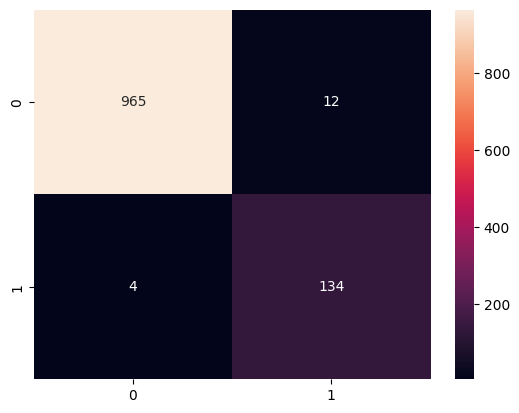

In [50]:
sns.heatmap(confusion_matrix(y_tset, pred), annot=True, fmt='.0f') # 혼돈 행렬 히트맵